# DEFINITIONS

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tqdm.notebook import tqdm as progressbar

In [2]:
def normalize_d(data):
    return (data - data.min()) / (data.max() - data.min())

def denormalize_d(data, base):
    return ( data * (base.max() - base.min()) ) + base.min()
    
def calculate_error(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestRegressor(random_state=42, n_estimators=100)
    clf.fit(x_train,y_train)
    y_generated = clf.predict(x_test)
    return mean_absolute_percentage_error(y_generated, y_test)

def train(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestRegressor(random_state=42, n_estimators=1000)
    clf.fit(x_train,y_train)
    return clf

# LOAD DATASETS

In [3]:
my_semantic = [
    'stature',
    'waist-girth',
    'hip-girth',
    'thigh-girth',
    'calf-girth',
    'neck-girth',
    'bust-girth',
    'wrist-girth',
    'upper-arm-girth',
    'biacromial-length',
    'neck-to-waist-length',
    'waist-height',
    'croth-height'
]
life_semantic = [
    'height',
    'waist_gth',
    'hip_gth',
    'thigh_gth_r_hz',# 'thigh_gth_l_hz'
    'calf_gth_r', # calf_gth_l
    'mid_neck_gth',
    'bust_chest_gth',
    'wrist_gth',
    'up_arm_gth_r',
    'cr_shoulder',
    'neck_waist_c_back',
    'waist_ht',
    'crotch_ht'
]
ansur_semantic = [
    'stature',
    'waistcircumference',
    'buttockcircumference',
    'thighcircumference',
    'calfcircumference',
    'neckcircumference',
    'chestcircumference',
    'wristcircumference',
    'bicepscircumferenceflexed',
    'biacromialbreadth',
    'waistbacklength',
    'waistheightomphalion',
    'crotchheight',
]


In [6]:
my_male = np.load("bodies-male-measures.npy")
my_female = np.load("bodies-female-measures.npy")

my_male = pd.DataFrame(my_male, columns=my_semantic)
my_female = pd.DataFrame(my_female, columns=my_semantic)
my_male['whr'] = my_male['waist-girth'] / my_male['hip-girth']
my_male['whtr'] = my_male['waist-girth'] / my_male['stature']
my_male

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height,whr,whtr
0,159.767795,90.233494,103.042731,112.504273,83.049072,39.591370,95.828031,17.551798,33.150874,35.089529,46.205666,90.582502,69.332957,0.875690,0.564779
1,204.972935,93.847177,106.415728,112.027659,83.581869,42.589846,107.102623,18.679099,32.951533,39.264601,57.083752,121.091032,95.390040,0.881892,0.457852
2,188.417935,98.689804,99.163777,101.696841,74.472540,41.786776,100.743099,18.373176,28.909787,36.457062,50.367949,111.922681,87.589550,0.995220,0.523781
3,171.818125,97.329251,106.620107,111.602743,78.741174,39.163732,98.553133,17.389570,27.529878,35.185346,49.577250,97.608960,75.044662,0.912860,0.566467
4,184.967661,128.174079,112.627602,112.224795,77.120494,46.404093,119.724250,19.039993,31.688685,38.081539,50.874696,108.682191,83.747733,1.138034,0.692954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,197.073030,86.098570,107.365516,116.053566,84.270729,41.150540,100.784486,17.802616,34.650784,39.205480,49.818917,122.444475,99.302900,0.801920,0.436887
2996,160.950828,99.652318,103.166575,107.456140,73.496233,40.568184,100.032912,17.117181,28.673725,34.688371,44.085118,93.858325,72.798759,0.965936,0.619148
2997,175.162745,102.110543,102.750485,105.045640,76.353968,41.520597,104.720755,18.081722,29.056701,36.794364,47.255715,102.890527,80.543804,0.993772,0.582947
2998,167.171764,100.106278,106.865939,113.977206,85.320062,43.763686,112.720853,18.566974,37.005741,39.163309,47.884793,95.103765,73.965502,0.936746,0.598823


In [8]:
ansur_male = pd.read_csv("datasets/ansur_2_male.csv",encoding_errors='ignore')
ansur_male_age = ansur_male['Age']
ansur_male = ansur_male[ansur_semantic]/10
ansur_male.columns = my_semantic

ansur_male['whr'] = ansur_male['waist-girth'] / ansur_male['hip-girth']
ansur_male['whtr'] = ansur_male['waist-girth'] / ansur_male['stature']

ansur_female = pd.read_csv("datasets/ansur_2_female.csv",encoding_errors='ignore')
ansur_female_age = ansur_female['Age']
ansur_female = ansur_female[ansur_semantic]/10
ansur_female.columns = my_semantic

ansur_male_normalized = normalize_d(ansur_male)
ansur_male_age_normalized = normalize_d(ansur_male_age)

ansur_female_normalized = normalize_d(ansur_female)
ansur_female_age_normalized = normalize_d(ansur_female_age)

ansur_male

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height,whr,whtr
0,177.6,93.3,97.9,61.0,37.3,40.0,107.4,17.5,36.9,40.1,50.1,105.4,87.7,0.953013,0.525338
1,170.2,87.0,94.4,57.2,35.7,38.0,102.1,16.7,33.8,39.4,43.2,105.4,85.1,0.921610,0.511163
2,173.5,96.4,105.4,68.5,41.2,40.3,112.0,18.0,40.8,42.7,47.2,104.1,85.4,0.914611,0.555620
3,165.5,85.7,99.1,60.4,39.5,40.7,111.4,17.6,35.9,40.1,46.1,96.8,76.9,0.864783,0.517825
4,191.4,86.8,102.9,67.2,42.5,39.8,104.8,18.8,35.6,43.5,46.7,124.5,101.4,0.843537,0.453501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,168.8,81.6,91.7,57.9,34.5,37.8,95.4,16.3,31.8,38.4,44.2,101.6,80.7,0.889858,0.483412
4078,176.5,97.8,104.9,66.2,39.9,39.2,107.2,17.8,37.4,42.8,47.5,108.2,84.8,0.932316,0.554108
4079,169.0,99.1,103.8,60.5,37.8,41.6,104.5,17.8,36.7,40.7,48.3,101.1,78.7,0.954721,0.586391
4080,171.8,78.3,92.9,54.4,38.9,38.7,98.4,17.2,36.5,41.9,43.0,106.2,84.6,0.842842,0.455763


In [11]:
life = pd.read_csv("datasets/life.csv",encoding_errors='ignore').dropna()

life_male = life[life['Gender'] == 'male']
life_male.columns = life_male.columns.str.lower()
life_male_age = life_male['age']
life_male = life_male[life_semantic]
life_male.columns = my_semantic
life_male['whr'] = life_male['waist-girth'] / life_male['hip-girth']
life_male['whtr'] = life_male['waist-girth'] / life_male['stature']

life_female = life[life['Gender'] == 'female']
life_female.columns = life_female.columns.str.lower()
life_female_age = life_female['age']
life_female = life_female[life_semantic]
life_female.columns = my_semantic

life_male_normalized = normalize_d(life_male)
life_male_age_normalized = normalize_d(life_male_age)

life_female_normalized = normalize_d(life_female)
life_female_age_normalized = normalize_d(life_female_age)
life_male

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height,whr,whtr
0,170.6,71.3,92.0,50.0,33.1,35.6,86.7,15.1,28.3,45.0,39.6,107.8,76.2,0.775000,0.417937
1,175.6,73.1,93.3,50.4,34.4,37.6,84.5,15.4,27.5,43.7,43.6,110.9,77.7,0.783494,0.416287
2,181.2,72.2,98.7,52.7,36.2,36.0,91.9,17.1,27.9,45.1,44.3,115.5,81.8,0.731510,0.398455
3,180.1,87.2,108.6,59.7,37.0,38.4,98.9,16.4,29.6,46.5,44.2,114.2,83.6,0.802947,0.484175
4,177.7,79.6,98.4,50.4,36.0,36.1,92.2,16.8,28.2,47.7,41.3,111.8,76.1,0.808943,0.447946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,173.9,104.1,100.9,48.2,36.4,39.8,101.1,18.9,28.9,47.9,43.3,109.6,74.2,1.031715,0.598620
8398,177.8,124.6,123.0,57.9,42.0,43.8,126.0,20.0,34.4,55.6,44.1,115.6,80.2,1.013008,0.700787
8399,168.2,110.5,108.2,52.8,38.0,45.1,107.3,17.3,29.6,54.1,42.3,108.9,73.8,1.021257,0.656956
8400,173.9,105.7,100.9,51.1,35.1,44.7,109.5,18.4,27.9,50.1,43.6,111.9,77.1,1.047572,0.607821


In [261]:
ansur_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,175.621460,94.057741,101.951886,62.514233,39.226066,39.764895,105.870554,17.591671,35.813572,41.567565,47.761244,105.648530,84.592994
std,6.855079,11.170587,7.668107,5.845217,2.970884,2.577676,8.743527,0.895506,3.461809,1.916165,2.772829,5.215467,4.649916
min,149.100000,64.800000,73.700000,41.200000,26.600000,31.100000,77.400000,14.100000,24.600000,33.700000,38.300000,87.600000,70.200000
25%,171.000000,85.700000,96.700000,58.600000,37.200000,37.925000,99.600000,17.000000,33.500000,40.300000,45.925000,102.000000,81.400000
50%,175.500000,93.700000,101.700000,62.400000,39.200000,39.500000,105.600000,17.600000,35.700000,41.500000,47.700000,105.500000,84.500000
75%,180.200000,101.600000,106.800000,66.200000,41.200000,41.375000,111.700000,18.200000,38.000000,42.800000,49.500000,109.000000,87.600000
max,199.300000,137.900000,130.500000,84.300000,52.300000,51.400000,146.900000,21.600000,49.000000,48.900000,59.800000,124.500000,103.100000


In [262]:
life_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,176.088858,100.668937,105.084021,55.632190,38.678485,42.224841,107.880496,18.217338,31.467081,50.258372,43.756663,111.097501,77.028403
std,7.487432,12.257658,7.610317,4.655902,3.029959,3.573047,9.642352,1.151149,2.814044,3.386522,2.308203,5.383601,4.870118
min,99.350000,68.600000,87.400000,37.700000,28.200000,33.100000,72.150000,14.350000,22.800000,32.300000,26.950000,61.550000,62.300000
25%,171.300000,92.100000,100.100000,52.600000,36.600000,39.700000,101.100000,17.400000,29.600000,48.000000,42.200000,107.500000,73.800000
50%,176.100000,100.000000,103.900000,55.400000,38.400000,41.800000,107.100000,18.150000,31.200000,50.100000,43.700000,111.000000,77.100000
75%,181.100000,108.500000,108.800000,58.300000,40.500000,44.400000,113.900000,19.000000,32.900000,52.300000,45.300000,114.600000,80.300000
max,206.500000,143.500000,157.700000,82.700000,51.900000,59.100000,155.400000,25.000000,48.900000,71.366667,53.000000,135.900000,99.500000


In [33]:
male_collection = pd.concat([life_male,ansur_male], axis=0)
female_collection = pd.concat([life_female,ansur_female], axis=0)
male_collection_age = pd.concat([life_male_age, ansur_male_age], axis=0)
female_collection_age = pd.concat([life_female_age, ansur_female_age], axis=0)

male_collection_normalized = normalize_d(male_collection)
female_collection_normalized = normalize_d(female_collection)

male_collection_age_normalized = normalize_d(male_collection_age)
female_collection_age_normalized = normalize_d(female_collection_age)

male_collection

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height,whr,whtr
0,170.6,71.3,92.0,50.0,33.1,35.6,86.7,15.1,28.3,45.0,39.6,107.8,76.2,0.775000,0.417937
1,175.6,73.1,93.3,50.4,34.4,37.6,84.5,15.4,27.5,43.7,43.6,110.9,77.7,0.783494,0.416287
2,181.2,72.2,98.7,52.7,36.2,36.0,91.9,17.1,27.9,45.1,44.3,115.5,81.8,0.731510,0.398455
3,180.1,87.2,108.6,59.7,37.0,38.4,98.9,16.4,29.6,46.5,44.2,114.2,83.6,0.802947,0.484175
4,177.7,79.6,98.4,50.4,36.0,36.1,92.2,16.8,28.2,47.7,41.3,111.8,76.1,0.808943,0.447946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,168.8,81.6,91.7,57.9,34.5,37.8,95.4,16.3,31.8,38.4,44.2,101.6,80.7,0.889858,0.483412
4078,176.5,97.8,104.9,66.2,39.9,39.2,107.2,17.8,37.4,42.8,47.5,108.2,84.8,0.932316,0.554108
4079,169.0,99.1,103.8,60.5,37.8,41.6,104.5,17.8,36.7,40.7,48.3,101.1,78.7,0.954721,0.586391
4080,171.8,78.3,92.9,54.4,38.9,38.7,98.4,17.2,36.5,41.9,43.0,106.2,84.6,0.842842,0.455763


<AxesSubplot:ylabel='Frequency'>

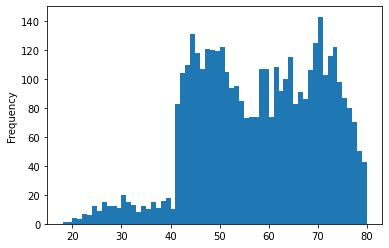

In [13]:
life_male_age.plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

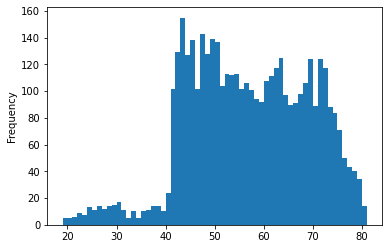

In [14]:
life_female_age.plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

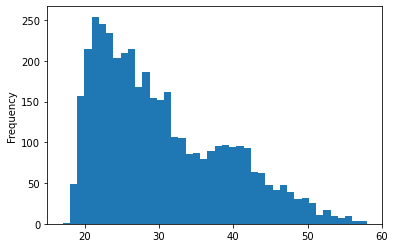

In [15]:
ansur_male_age.plot(kind='hist', bins=42)

<AxesSubplot:ylabel='Frequency'>

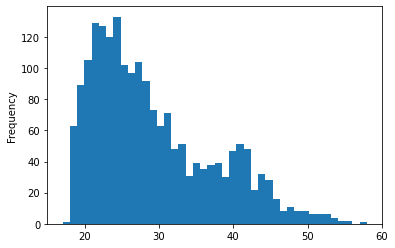

In [16]:
ansur_female_age.plot(kind='hist', bins=42)

<AxesSubplot:ylabel='Frequency'>

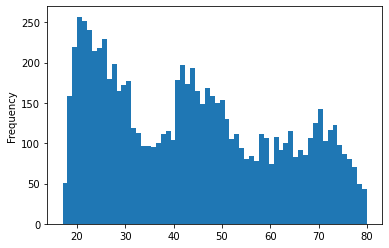

In [17]:
pd.concat([life_male_age, ansur_male_age], axis=0).plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

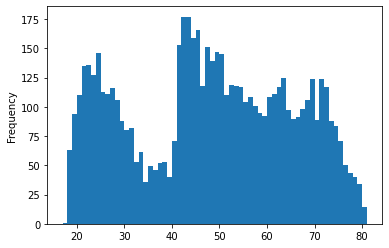

In [18]:
pd.concat([life_female_age, ansur_female_age], axis=0).plot(kind='hist', bins=64)

<AxesSubplot:title={'center':'Grouped Datasets Age Histogram'}, ylabel='Frequency'>

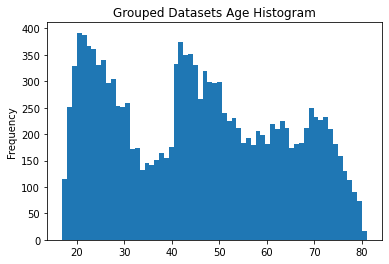

In [270]:
from matplotlib import pyplot as plt
pd.concat([life_male_age, ansur_male_age, life_female_age, ansur_female_age], axis=0).plot(kind='hist', bins=63, title="Grouped Datasets Age Histogram", xlabel='Age')

In [24]:
life_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height,whr,whtr
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,176.088858,100.668937,105.084021,55.632190,38.678485,42.224841,107.880496,18.217338,31.467081,50.258372,43.756663,111.097501,77.028403,0.956387,0.572718
std,7.487432,12.257658,7.610317,4.655902,3.029959,3.573047,9.642352,1.151149,2.814044,3.386522,2.308203,5.383601,4.870118,0.075424,0.073608
min,99.350000,68.600000,87.400000,37.700000,28.200000,33.100000,72.150000,14.350000,22.800000,32.300000,26.950000,61.550000,62.300000,0.701839,0.380670
25%,171.300000,92.100000,100.100000,52.600000,36.600000,39.700000,101.100000,17.400000,29.600000,48.000000,42.200000,107.500000,73.800000,0.906635,0.519959
50%,176.100000,100.000000,103.900000,55.400000,38.400000,41.800000,107.100000,18.150000,31.200000,50.100000,43.700000,111.000000,77.100000,0.964427,0.569565
75%,181.100000,108.500000,108.800000,58.300000,40.500000,44.400000,113.900000,19.000000,32.900000,52.300000,45.300000,114.600000,80.300000,1.011002,0.621164
max,206.500000,143.500000,157.700000,82.700000,51.900000,59.100000,155.400000,25.000000,48.900000,71.366667,53.000000,135.900000,99.500000,1.164857,0.819872


In [272]:
ansur_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,175.621460,94.057741,101.951886,62.514233,39.226066,39.764895,105.870554,17.591671,35.813572,41.567565,47.761244,105.648530,84.592994
std,6.855079,11.170587,7.668107,5.845217,2.970884,2.577676,8.743527,0.895506,3.461809,1.916165,2.772829,5.215467,4.649916
min,149.100000,64.800000,73.700000,41.200000,26.600000,31.100000,77.400000,14.100000,24.600000,33.700000,38.300000,87.600000,70.200000
25%,171.000000,85.700000,96.700000,58.600000,37.200000,37.925000,99.600000,17.000000,33.500000,40.300000,45.925000,102.000000,81.400000
50%,175.500000,93.700000,101.700000,62.400000,39.200000,39.500000,105.600000,17.600000,35.700000,41.500000,47.700000,105.500000,84.500000
75%,180.200000,101.600000,106.800000,66.200000,41.200000,41.375000,111.700000,18.200000,38.000000,42.800000,49.500000,109.000000,87.600000
max,199.300000,137.900000,130.500000,84.300000,52.300000,51.400000,146.900000,21.600000,49.000000,48.900000,59.800000,124.500000,103.100000


In [273]:
life_female.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,164.549745,90.445974,107.663437,57.346449,37.507700,35.874316,101.038740,16.382374,29.616314,46.334045,40.717312,102.532019,72.721344
std,6.880675,13.370739,10.024415,5.750482,3.420016,3.235896,11.007442,1.246011,3.221412,3.693511,2.369814,5.153316,4.274504
min,141.600000,59.700000,83.100000,38.500000,27.700000,28.000000,74.800000,12.800000,20.300000,36.600000,32.300000,84.750000,59.300000
25%,159.600000,80.100000,100.900000,53.500000,35.200000,33.500000,93.000000,15.500000,27.400000,43.800000,39.100000,99.000000,69.800000
50%,164.200000,89.700000,106.000000,56.600000,37.100000,35.400000,99.900000,16.200000,29.100000,46.000000,40.700000,102.300000,72.400000
75%,169.100000,99.225000,112.925000,60.500000,39.300000,37.900000,108.000000,17.100000,31.300000,48.400000,42.200000,106.100000,75.600000
max,188.400000,143.600000,183.300000,108.000000,61.900000,51.900000,148.200000,25.400000,45.000000,102.000000,51.300000,122.800000,90.400000


In [274]:
ansur_female.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,croth-height
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,162.847331,86.090534,102.124773,61.614854,37.325780,32.979557,94.685801,15.479255,30.557855,36.534894,42.540282,98.014904,78.231722
std,6.419951,9.993177,7.589471,5.581030,2.851518,1.922114,8.269911,0.782770,3.075703,1.829885,2.638895,5.002271,4.463674
min,140.900000,61.100000,79.800000,44.800000,28.200000,27.500000,69.500000,12.400000,21.600000,28.300000,34.500000,80.500000,61.000000
25%,158.625000,79.000000,96.900000,57.900000,35.400000,31.600000,88.900000,15.000000,28.500000,35.300000,40.700000,94.700000,75.300000
50%,162.600000,85.200000,101.850000,61.300000,37.200000,32.800000,94.000000,15.400000,30.400000,36.500000,42.450000,97.750000,78.000000
75%,167.200000,92.500000,106.900000,65.100000,39.175000,34.200000,99.900000,16.000000,32.400000,37.800000,44.200000,101.300000,81.200000
max,182.900000,133.400000,134.100000,87.000000,48.200000,42.400000,126.600000,18.300000,43.500000,42.200000,53.200000,114.200000,94.700000


# REGRESSOR TEST

In [19]:
# print(1 - calculate_error(life_male_normalized, life_male_age_normalized))
# print(1 - calculate_error(life_female_normalized, life_female_age_normalized))
# print(1 - calculate_error(ansur_male_normalized, ansur_male_age_normalized))
# print(1 - calculate_error(ansur_female_normalized, ansur_female_age_normalized))
print(1 - calculate_error(male_collection, male_collection_age))
print(1 - calculate_error(female_collection, female_collection_age))
print(1 - calculate_error(male_collection_normalized, male_collection_age_normalized))
print(1 - calculate_error(female_collection_normalized, female_collection_age_normalized))

0.8438356838054404
0.8413091634544878
0.6818492784615682
0.6913529141733045


In [26]:
X = male_collection
y = male_collection_age
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(random_state=42, n_estimators=100)
clf.fit(x_train,y_train)
print("Importancia:")
for score, name in sorted(zip(clf.feature_importances_, my_semantic+['whr', 'whtr'])):
    print('{:06.2%}'.format(score), name)

Importancia:
01.11% stature
01.12% waist-height
01.60% bust-girth
01.60% neck-to-waist-length
01.65% neck-girth
01.66% calf-girth
01.68% hip-girth
01.71% waist-girth
02.30% croth-height
02.86% wrist-girth
03.37% whtr
04.27% upper-arm-girth
08.51% thigh-girth
11.60% whr
54.95% biacromial-length


In [27]:
X = ansur_male_normalized
y = ansur_male_age_normalized
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(random_state=42, n_estimators=100)
clf.fit(x_train,y_train)
print("Importancia:")
for score, name in sorted(zip(clf.feature_importances_, my_semantic+['whr', 'whtr'])):
    print('{:06.2%}'.format(score), name)

Importancia:
03.21% waist-girth
03.31% hip-girth
03.34% stature
03.46% waist-height
04.06% croth-height
04.50% biacromial-length
04.69% whtr
04.75% wrist-girth
04.94% neck-to-waist-length
05.10% calf-girth
05.31% neck-girth
05.59% bust-girth
06.15% upper-arm-girth
09.26% thigh-girth
32.34% whr


# AGE INTERVAL ANALISYS

In [278]:
def interval_tests(data_normalized, age, nage, interval):
    age_interval = age.between(*interval)
    data_normalized = data_normalized[age_interval]
    nage = nage[age_interval]
    if data_normalized.size == 0:
        return np.nan
    error = calculate_error(data_normalized, nage)
    return error

In [32]:
datasets_array = [
    ('life_male', life_male_normalized, life_male_age, life_male_age_normalized),
    ('life_female', life_female_normalized, life_female_age, life_female_age_normalized),
    ('ansur_male', ansur_male_normalized, ansur_male_age, ansur_male_age_normalized),
    ('ansur_female', ansur_female_normalized, ansur_female_age, ansur_female_age_normalized),
    ('collection_male', male_collection_normalized, male_collection_age, male_collection_age_normalized),
    ('collection_female', female_collection_normalized, female_collection_age, female_collection_age_normalized),
]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

<AxesSubplot:>

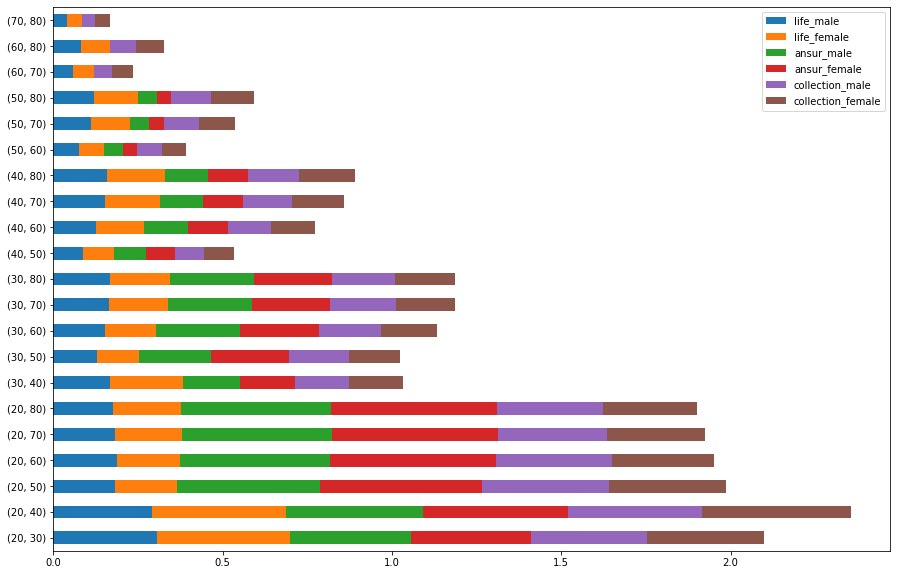

In [280]:
data_extracted = {}
comb = list(combinations(range(20,81,10), 2))
for name, data, nage, age in progressbar(datasets_array):
    data_extracted[name] = []
    for interval in progressbar(comb, leave=False):
        test = interval_tests(data, nage, age, interval)
        data_extracted[name].append(test)
extracted = pd.DataFrame(data_extracted, index=comb)
extracted.plot(kind='barh', figsize=(15,10), stacked=True)

<AxesSubplot:>

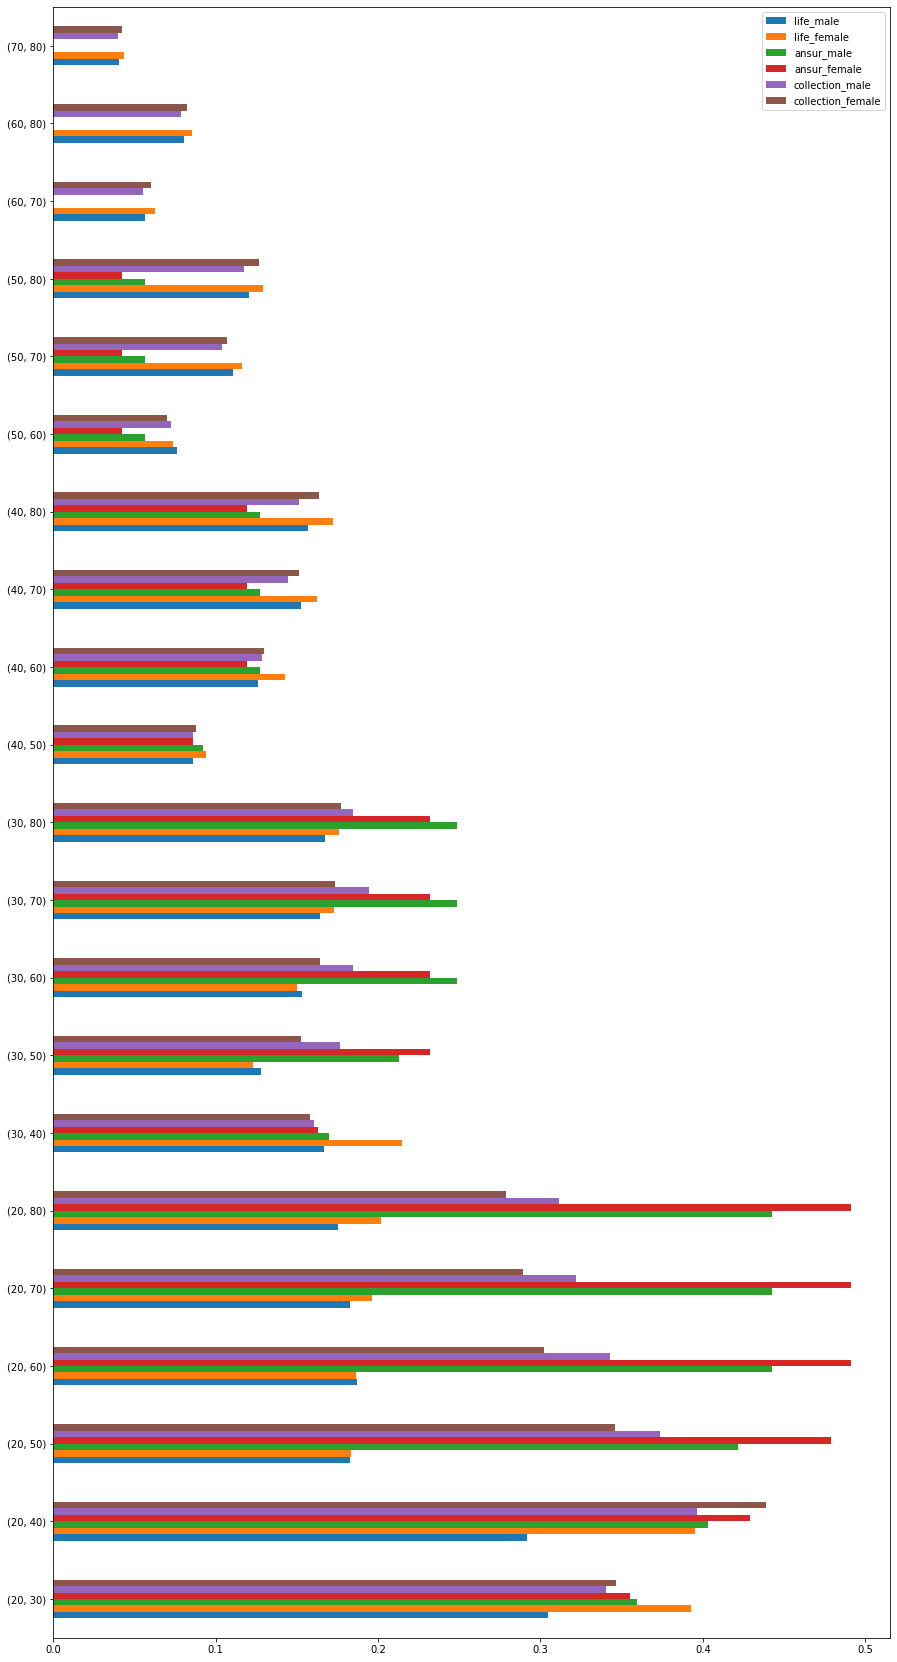

In [281]:
extracted.plot(kind='barh', figsize=(15,30))

<AxesSubplot:>

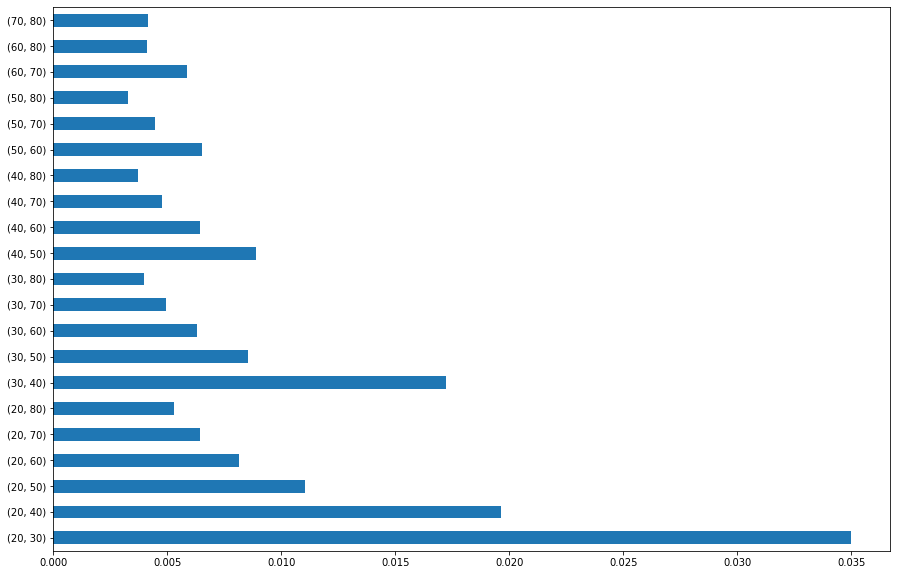

In [282]:
mean_of_errors = extracted.mean(axis=1)
interval_sizes = np.diff(np.array(list(extracted.index)), axis=1).flatten()
factor = mean_of_errors/interval_sizes
factor.plot(kind='barh', figsize=(15,10))

In [283]:
minimal = factor.argmin()
print(factor.keys()[minimal], factor[minimal])

(50, 80) 0.0032851657193241272


In [284]:
factor_copy = factor.copy()
minimal_id = factor.keys()[minimal]
factor_copy = factor_copy.drop(index=minimal_id)
minimal = factor_copy.argmin()
print(factor_copy.keys()[minimal], factor_copy[minimal])

(40, 80) 0.003708460659868928


# REGRESSORS APPLY

In [62]:
# def applier(source_data, source_age, target_data, interval=(15, 85)):
#     selected_ages = source_age.between(*interval)
#     selected_source_data = source_data[selected_ages]
#     selected_source_age = source_age[selected_ages]
    
#     predictor = train(normalize_d(selected_source_data), normalize_d(selected_source_age))
#     target_age = predictor.predict(normalize_d(target_data))
#     target_age = denormalize_d(target_age, selected_source_age)
#     target_age = np.rint(target_age)

#     pd.Series(target_age).plot(kind="hist", bins=np.arange(interval[0], interval[1], 1), figsize=(20,5))
#     return target_age

def applier(source_data, source_age, target_data, interval=(15, 85, 1)):

    selected_ages = source_age.between(*interval[:2])
    selected_source_data = source_data[selected_ages]
    selected_source_age = source_age[selected_ages]

    predictor = train(selected_source_data, selected_source_age)
    target_age = predictor.predict(target_data)
#     target_age = np.rint(target_age)

    pd.Series(target_age).plot(kind="hist", bins=np.arange(interval[0], interval[1], interval[2]), figsize=(20,5))
    return target_age

## REGRESSOR APPLY WITH COLLECTION

array([38., 33., 47., ..., 50., 31., 33.])

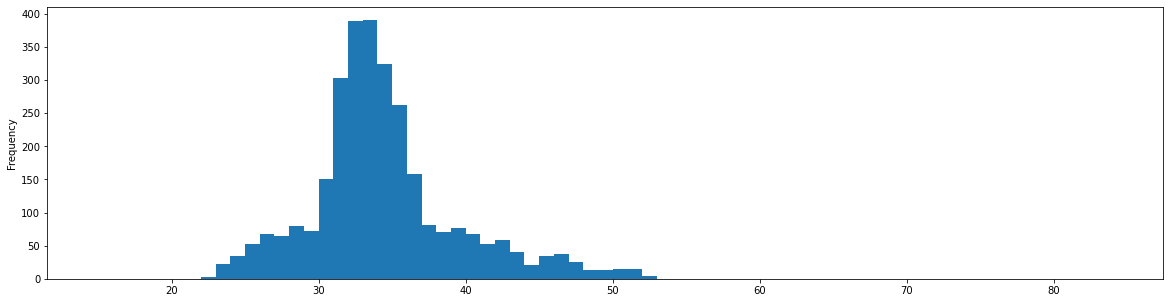

In [30]:
applier(male_collection, male_collection_age, my_male)

array([0.56117742, 0.52156452, 0.53219355, ..., 0.56922581, 0.56930645,
       0.57304839])

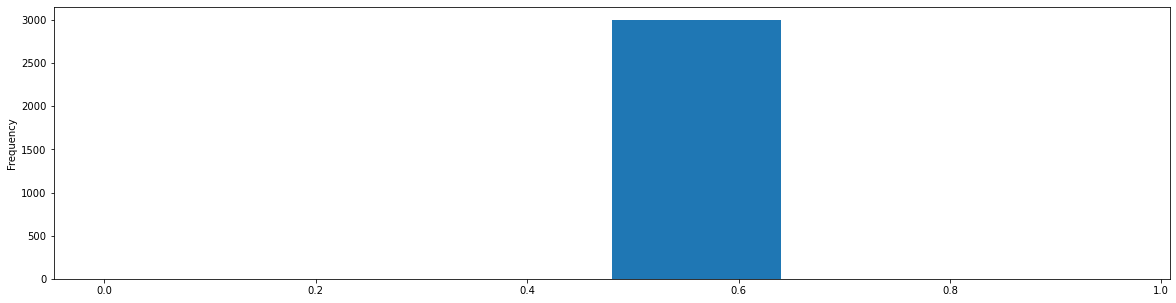

In [63]:
applier(life_male_normalized, life_male_age_normalized, my_male, (0,1, 0.15))


array([38., 32., 35., ..., 35., 33., 37.])

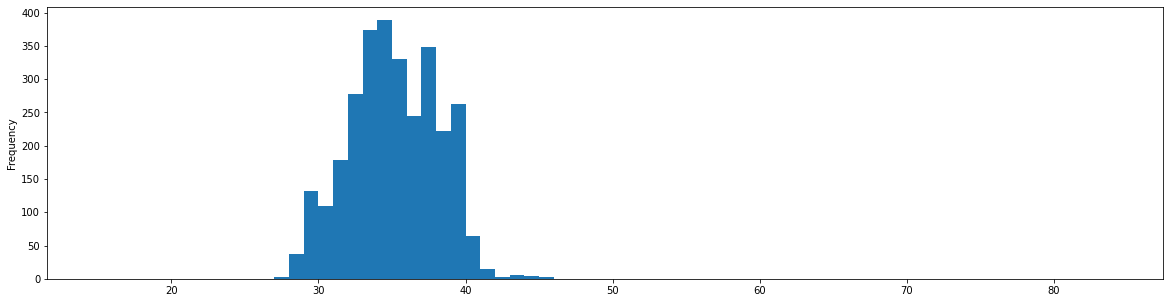

In [311]:
applier(female_collection, female_collection_age, my_female)

array([68., 56., 57., ..., 57., 65., 59.])

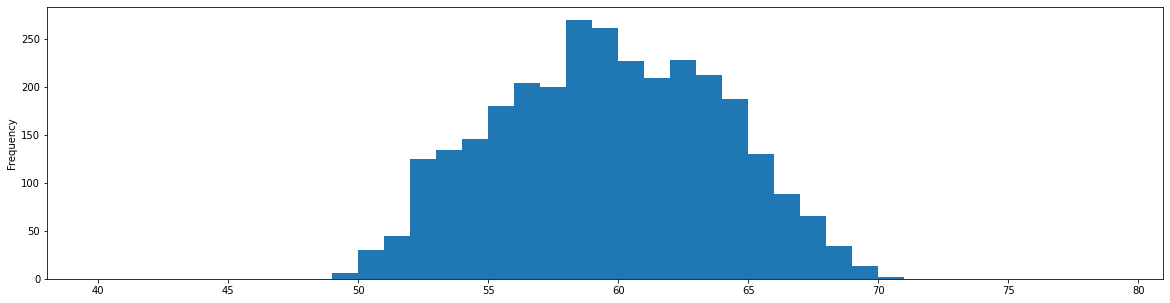

In [288]:
applier(male_collection, male_collection_age, my_male, (40,80))

array([48., 57., 52., ..., 48., 54., 65.])

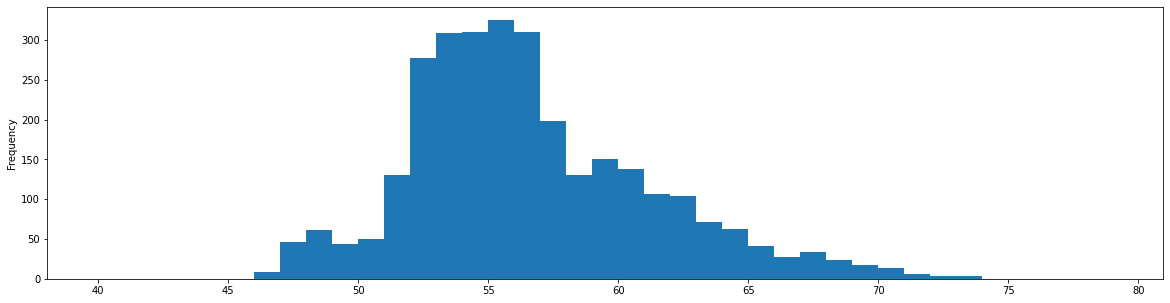

In [289]:
applier(female_collection, female_collection_age, my_female, (40,80))

## REGRESSOR APPLY WITH LIFE

array([66., 52., 53., ..., 57., 64., 62.])

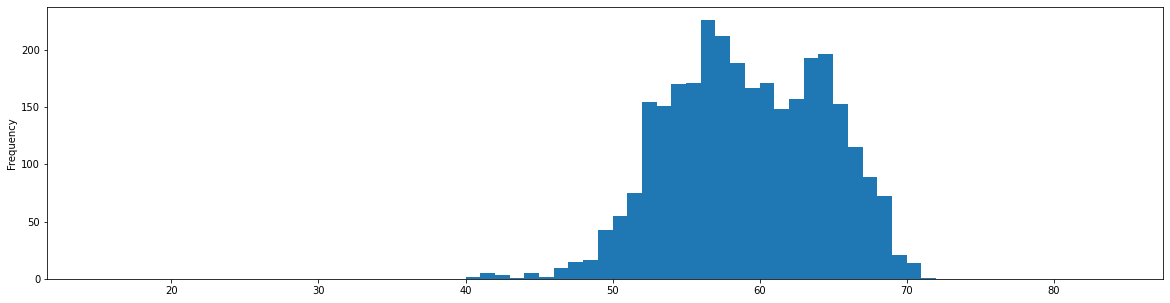

In [290]:
applier(life_male, life_male_age, my_male)

array([40., 58., 51., ..., 45., 53., 66.])

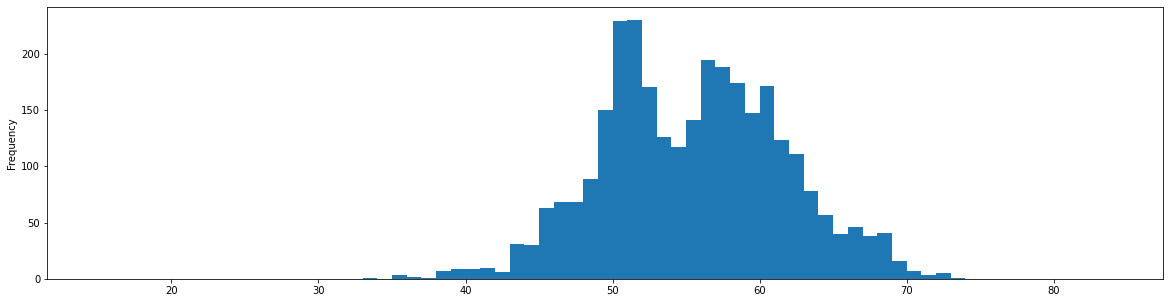

In [291]:
applier(life_female, life_female_age, my_female)


array([68., 60., 61., ..., 58., 67., 58.])

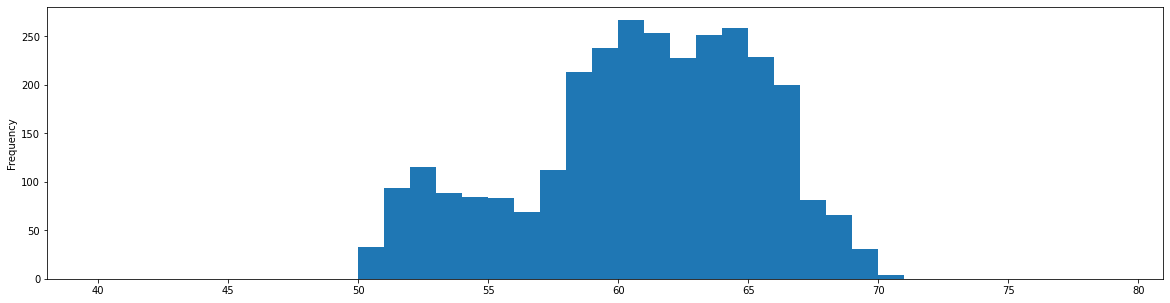

In [292]:
applier(life_male, life_male_age, my_male, (40,80))

array([48., 58., 55., ..., 48., 56., 67.])

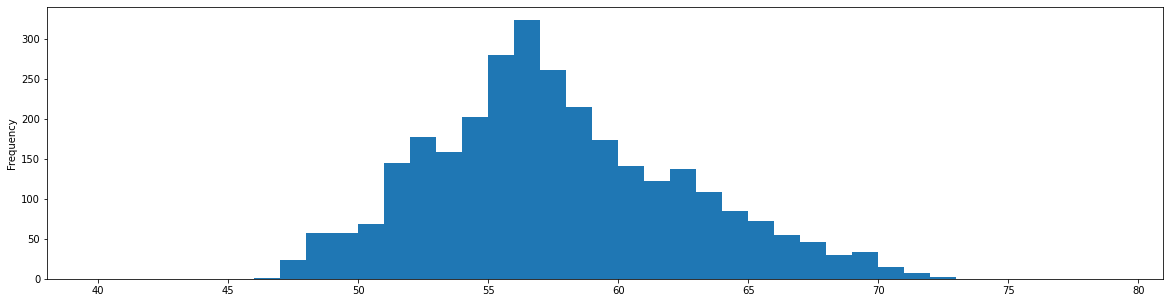

In [293]:
applier(life_female, life_female_age, my_female, (40,80))

# BODIES DIFFERENCES

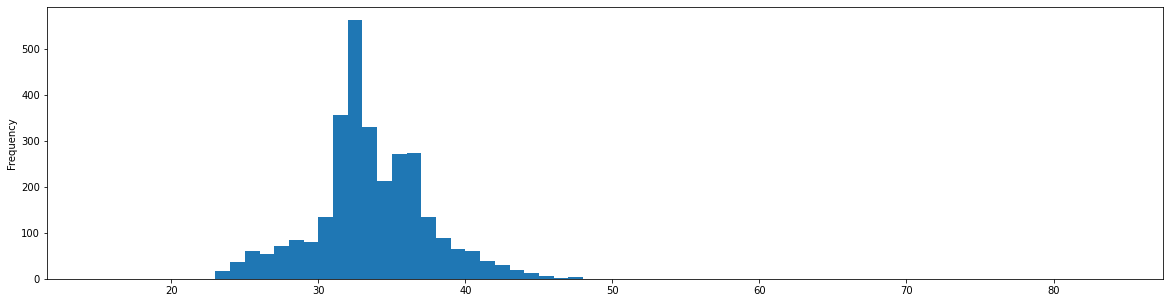

In [313]:
my_male_age = applier(male_collection, male_collection_age, my_male)

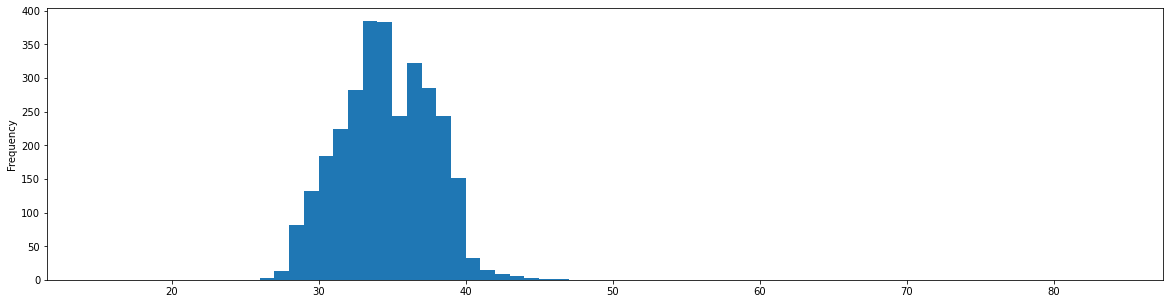

In [64]:
my_female_age = applier(female_collection, female_collection_age, my_female)

In [315]:
from scipy.spatial.distance import cdist

In [316]:
def calculate_difference(source, target, age):
    interval = (age, age)

    source_copy = source.copy()
    source_copy = source_copy[source_copy.age.between(*interval)]
    source_copy = source_copy.drop('age', axis=1)

    target_copy = target.copy()
    target_copy = target_copy[target_copy.age.between(*interval)]
    target_copy = target_copy.drop('age', axis=1)

    source_min = source_copy.min()
    source_max = source_copy.max()

    source_copy = (source_copy - source_min) / (source_max - source_min)
    target_copy = (target_copy - source_min) / (source_max - source_min)

    distances = cdist(target_copy, source_copy, 'euclidean')

    minimals = np.argmin(distances, axis=1)
    errors = distances.transpose()[minimals].diagonal()
    return errors

In [323]:
my_male_copy = my_male.copy()
my_male_copy['age'] = my_male_age

male_collection_copy = male_collection.copy()
male_collection_copy['age'] = male_collection_age

min_age = my_male_copy.age.min()
max_age = my_male_copy.age.max()

values = []
for age in np.arange(min_age, max_age+1):
    differences=calculate_difference(male_collection_copy, my_male_copy, age)/13
    values.append([differences.min(), differences.max(), differences.mean(), differences.std()])
male_values = np.array(values)

<AxesSubplot:>

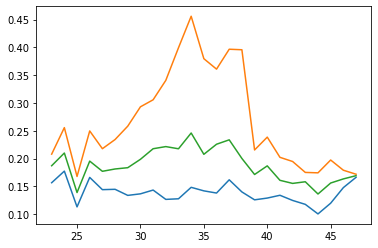

In [324]:
pd.Series(male_values[:,0], np.arange(min_age, max_age+1)).plot()
pd.Series(male_values[:,1], np.arange(min_age, max_age+1)).plot()
pd.Series(male_values[:,2], np.arange(min_age, max_age+1)).plot()

In [325]:
my_female_copy = my_female.copy()
my_female_copy['age'] = my_female_age

female_collection_copy = female_collection.copy()
female_collection_copy['age'] = female_collection_age

min_age = my_female_copy.age.min()
max_age = my_female_copy.age.max()

values = []
for age in np.arange(min_age, max_age+1):
    differences=calculate_difference(female_collection_copy, my_female_copy, age)/13
    values.append([differences.min(), differences.max(), differences.mean(), differences.std()])
female_values = np.array(values)

<AxesSubplot:>

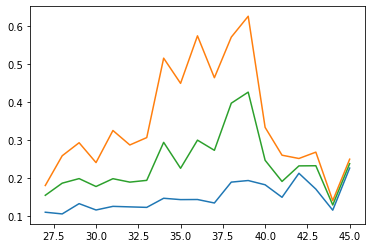

In [326]:
pd.Series(female_values[:,0], np.arange(min_age, max_age+1)).plot()
pd.Series(female_values[:,1], np.arange(min_age, max_age+1)).plot()
pd.Series(female_values[:,2], np.arange(min_age, max_age+1)).plot()